In [43]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# A sample log file content string
log_data = """
127.0.0.1 - - [16/Oct/2025:13:55:36 +0100] "GET /home HTTP/1.1" 200 1024
192.168.1.1 - - [16/Oct/2025:13:56:12 +0100] "GET /products/ HTTP/1.1" 200 2048
192.168.1.1 - - [16/Oct/2025:13:56:15 +0100] "GET /products/widget-a HTTP/1.1" 200 1536
127.0.0.1 - - [16/Oct/2025:13:57:01 +0100] "GET /services HTTP/1.1" 200 1024
10.0.0.5 - - [16/Oct/2025:14:05:22 +0100] "POST /login HTTP/1.1" 200 512
192.168.1.1 - - [16/Oct/2025:14:05:45 +0100] "GET /products/widget-b HTTP/1.1" 200 1536
10.0.0.5 - - [16/Oct/2025:14:06:30 +0100] "GET /about-us HTTP/1.1" 200 896
172.16.0.10 - - [16/Oct/2025:14:10:11 +0100] "GET /contact HTTP/1.1" 200 1024
192.168.1.1 - - [16/Oct/2025:14:11:50 +0100] "GET /products/widget-c HTTP/1.1" 404 128
10.0.0.5 - - [16/Oct/2025:15:20:00 +0100] "GET /services HTTP/1.1" 200 1024
127.0.0.1 - - [16/Oct/2025:15:21:15 +0100] "GET /home HTTP/1.1" 200 1024
192.168.1.1 - - [16/Oct/2025:15:22:30 +0100] "GET /products/ HTTP/1.1" 200 2048
10.0.0.5 - - [16/Oct/2025:15:25:00 +0100] "GET /old-page HTTP/1.1" 404 128
172.16.0.10 - - [16/Oct/2025:16:30:40 +0100] "GET /admin HTTP/1.1" 403 128
10.0.0.5 - - [16/Oct/2025:16:32:10 +0100] "GET /services HTTP/1.1" 200 1024
192.168.1.1 - - [16/Oct/2025:16:33:00 +0100] "GET /api/data HTTP/1.1" 500 0
"""

# Write the log data to a file
with open('server.log', 'w') as f:
    f.write(log_data.strip())

print("server.log file created successfully.")

server.log file created successfully.


In [45]:
# Regex to parse the Common Log Format
log_pattern = re.compile(r'(\S+) - - \[(.*?)] "(\S+) (\S+) (\S+)" (\d{3}) (\d+)')

# Function to parse a single log line
def parse_log_line(line):
    match = log_pattern.match(line)
    if match:
        return {
            'ip_address': match.group(1),
            'timestamp': pd.to_datetime(match.group(2), format='%d/%b/%Y:%H:%M:%S %z'),
            'method': match.group(3),
            'url': match.group(4),
            'protocol': match.group(5),
            'status_code': int(match.group(6)),
            'response_size': int(match.group(7)),
        }
    return None

# Read and parse the log file
with open('server.log', 'r') as f:
    parsed_logs = [parse_log_line(line) for line in f]

# Filter out any lines that didn't match
parsed_logs = [log for log in parsed_logs if log]

# Create a DataFrame
df = pd.DataFrame(parsed_logs)

print("Log file parsed into DataFrame:")
display(df.head())

Log file parsed into DataFrame:


,ip_address,timestamp,method,url,protocol,status_code,response_size
0,127.0.0.1,2025-10-16 13:55:36+01:00,GET,/home,HTTP/1.1,200,1024
1,192.168.1.1,2025-10-16 13:56:12+01:00,GET,/products/,HTTP/1.1,200,2048
2,192.168.1.1,2025-10-16 13:56:15+01:00,GET,/products/widget-a,HTTP/1.1,200,1536
3,127.0.0.1,2025-10-16 13:57:01+01:00,GET,/services,HTTP/1.1,200,1024
4,10.0.0.5,2025-10-16 14:05:22+01:00,POST,/login,HTTP/1.1,200,512


In [47]:
# 1. Most Visited Pages
top_pages = df['url'].value_counts().nlargest(10)
print("--- Top 10 Most Visited Pages ---")
print(top_pages)
print("\n" + "="*35 + "\n")

# 2. Status Code Analysis & Error Rate
status_counts = df['status_code'].value_counts()
error_df = df[df['status_code'] >= 400]
error_rate = (len(error_df) / len(df)) * 100
print("--- HTTP Status Code Distribution ---")
print(status_counts)
print(f"\nOverall Error Rate: {error_rate:.2f}%")
print("\n" + "="*35 + "\n")


# 3. Traffic Patterns Over Time
df['hour'] = df['timestamp'].dt.hour
traffic_by_hour = df['hour'].value_counts().sort_index()
print("--- Traffic by Hour of the Day ---")
print(traffic_by_hour)

--- Top 10 Most Visited Pages ---
url
/services             3
/home                 2
/products/            2
/products/widget-a    1
/login                1
/products/widget-b    1
/about-us             1
/contact              1
/products/widget-c    1
/old-page             1
Name: count, dtype: int64


--- HTTP Status Code Distribution ---
status_code
200    12
404     2
403     1
500     1
Name: count, dtype: int64

Overall Error Rate: 25.00%


--- Traffic by Hour of the Day ---
hour
13    4
14    5
15    4
16    3
Name: count, dtype: int64


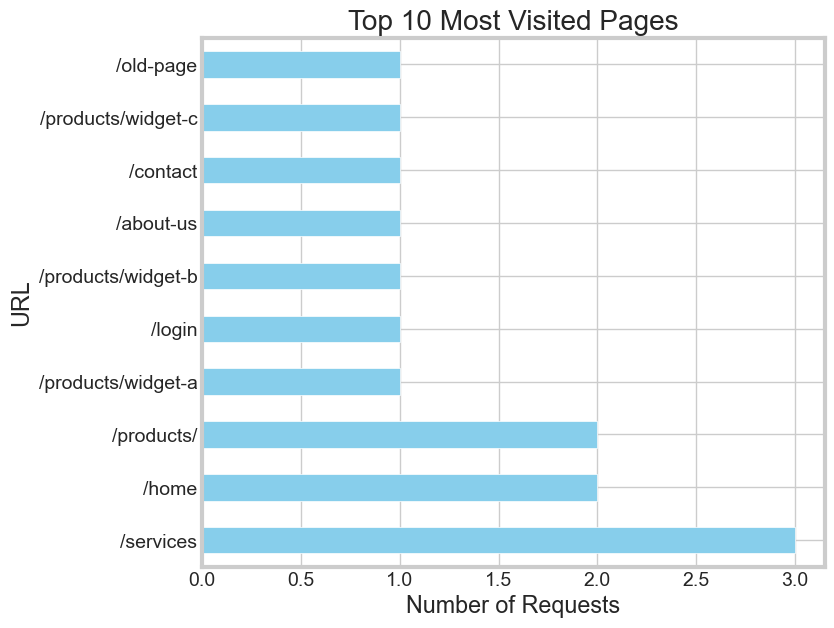

In [51]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Plot 1: Top 10 Most Visited Pages
plt.subplot(2, 2, 1)
top_pages.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Visited Pages')
plt.xlabel('Number of Requests')
plt.ylabel('URL')

plt.tight_layout()
plt.show()

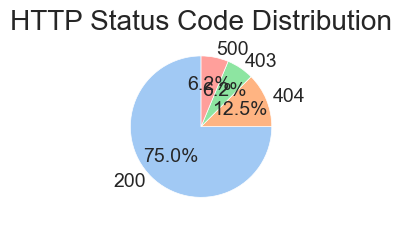

In [55]:
# Plot 2: HTTP Status Code Distribution
plt.subplot(2, 2, 2)
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   colors=sns.color_palette("pastel"))
plt.title('HTTP Status Code Distribution')
plt.ylabel('') # Hide the y-label for pie charts

# plt.tight_layout()
plt.show()

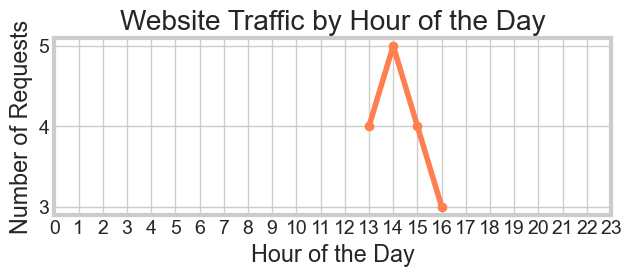

In [65]:
# Plot 3: Traffic by Hour
plt.subplot(2, 1, 2) # This plot will take the bottom half of the figure
traffic_by_hour.plot(kind='line', marker='o', color='coral')
plt.title('Website Traffic by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.grid(True)

# plt.tight_layout()
plt.show()

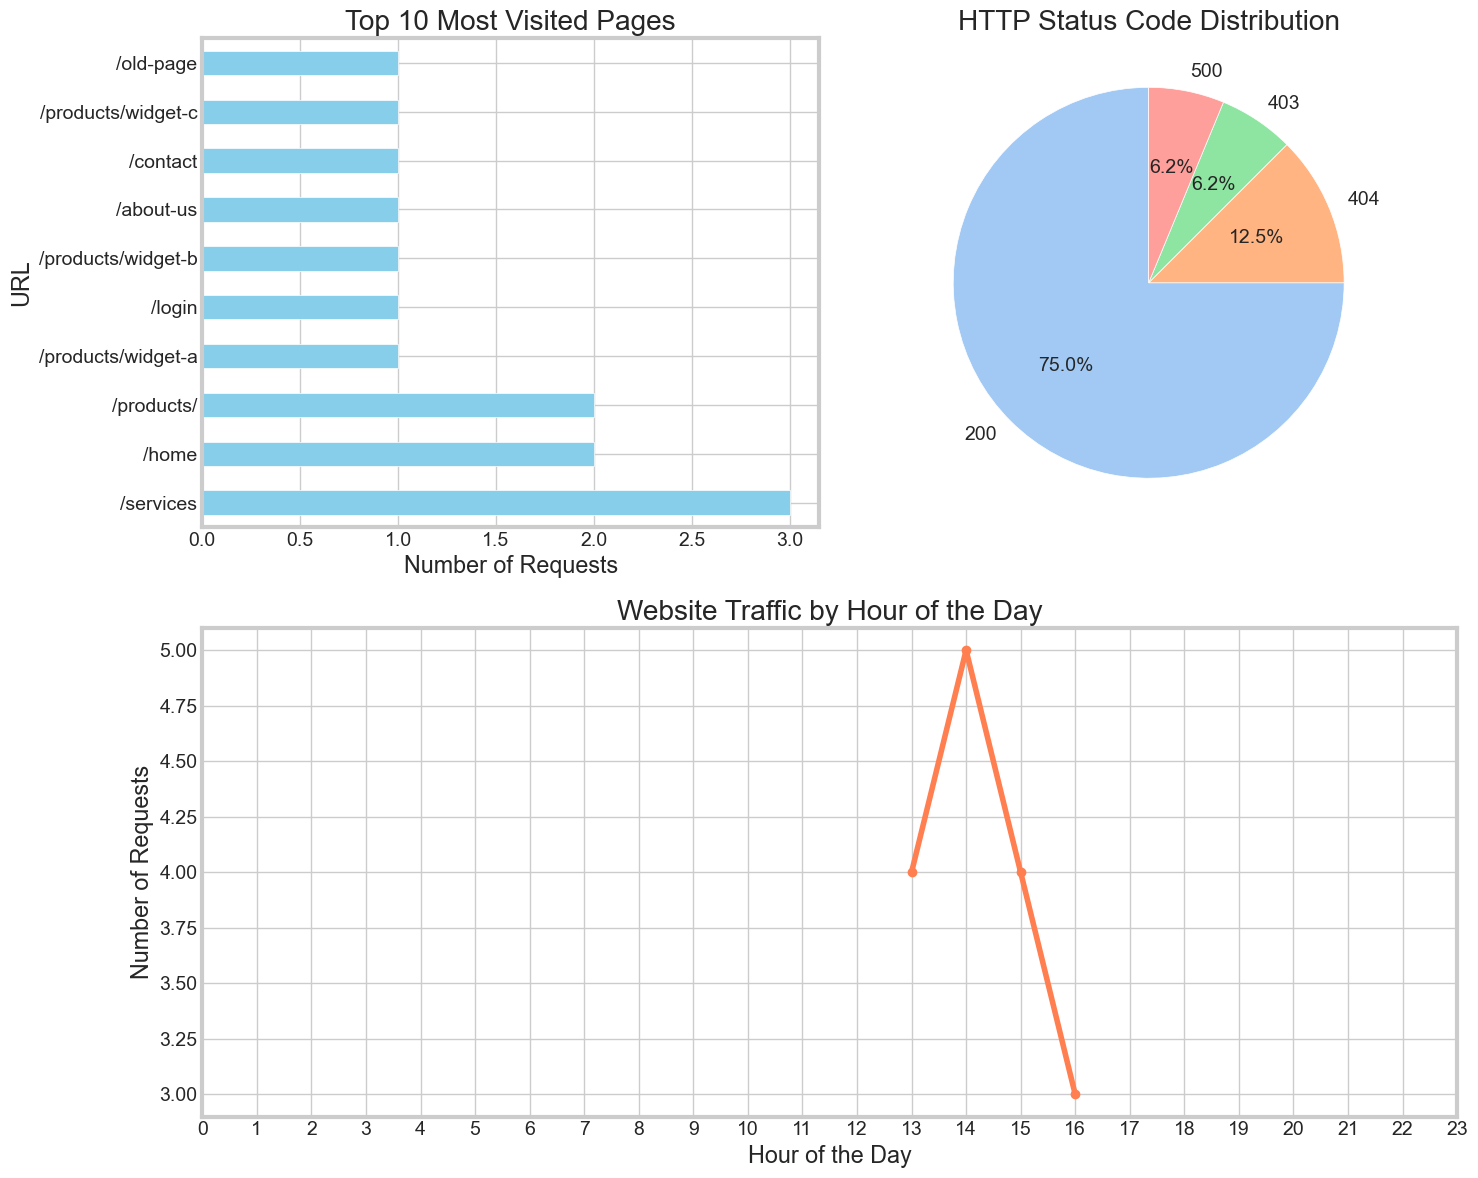

In [69]:
# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# Plot 1: Top 10 Most Visited Pages
plt.subplot(2, 2, 1)
top_pages.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Visited Pages')
plt.xlabel('Number of Requests')
plt.ylabel('URL')

# Plot 2: HTTP Status Code Distribution
plt.subplot(2, 2, 2)
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                   colors=sns.color_palette("pastel"))
plt.title('HTTP Status Code Distribution')
plt.ylabel('') # Hide the y-label for pie charts

# Plot 3: Traffic by Hour
plt.subplot(2, 1, 2) # This plot will take the bottom half of the figure
traffic_by_hour.plot(kind='line', marker='o', color='coral')
plt.title('Website Traffic by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Requests')
plt.xticks(range(24))
plt.grid(True)

plt.tight_layout()
plt.show()

***A simulated server log file was parsed using regular expressions to structure the data for analysis. The findings identified the most frequently visited pages, calculated the server's error rate (identifying 404 Not Found as a key issue), and revealed traffic patterns, with activity peaking in the afternoon. This analysis is crucial for understanding user behavior and monitoring server health.***